In [0]:
import matplotlib.pyplot as plt
import networkx as nx
import gzip
from string import ascii_lowercase as lowercase

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [13]:
#For Google Colaboratory
from google.colab import files
uploaded = files.upload()

Saving words_dat.txt.gz to words_dat.txt.gz


In [14]:
#Loading the words graph. Reference: https://networkx.github.io/documentation/stable/auto_examples/graph/words.html

def generate_graph(words):
    G = nx.Graph(name="words")
    lookup = dict((c, lowercase.index(c)) for c in lowercase)

    def edit_distance_one(word):
        for i in range(len(word)):
            left, c, right = word[0:i], word[i], word[i + 1:]
            j = lookup[c]  # lowercase.index(c)
            for cc in lowercase[j + 1:]:
                yield left + cc + right
    candgen = ((word, cand) for word in sorted(words)
               for cand in edit_distance_one(word) if cand in words)
    G.add_nodes_from(words)
    for word, cand in candgen:
        G.add_edge(word, cand)
    return G


def words_graph():
    """Return the words example graph from the Stanford GraphBase"""
    fh = gzip.open('words_dat.txt.gz', 'r')
    words = set()
    for line in fh.readlines():
        line = line.decode()
        if line.startswith('*'):
            continue
        w = str(line[0:5])
        words.add(w)
    return generate_graph(words)


if __name__ == '__main__':
    G = words_graph()
    print("Loaded words_dat.txt containing 5757 five-letter English words.")
    print("Two words are connected if they differ in one letter.")
    print("Graph has %d nodes with %d edges"
          % (nx.number_of_nodes(G), nx.number_of_edges(G)))
    print("%d connected components" % nx.number_connected_components(G))


Loaded words_dat.txt containing 5757 five-letter English words.
Two words are connected if they differ in one letter.
Graph has 5757 nodes with 14135 edges
853 connected components


In [18]:
def betweenness_centrality(G):
    ranking = nx.betweenness_centrality(G).items()
    print (ranking)
    r = [x[1] for x in ranking]
    avg_cent = sum(r)/len(r) # average centrality
    thresh = avg_cent*5 # threshold for average centrality
    G_copy = G.copy()
    for k, v in ranking:
      if v < thresh:
        G_copy.remove_node(k)
    return G_copy

G_copy = betweenness_centrality(G) # trimmed version

dict_items([('lakes', 0.0007981301726164636), ('mercy', 0.0), ('means', 0.0012925929999384799), ('skyed', 0.0), ('chute', 0.0), ('golem', 0.0), ('shaky', 7.226076812863893e-05), ('grays', 0.0004928365308090523), ('rehab', 0.0), ('ripen', 5.255742300020102e-06), ('drabs', 0.0004319094723225051), ('brink', 0.0019486620611763338), ('luted', 4.8148453988706966e-05), ('pieta', 0.0), ('riser', 0.0003953042787917343), ('ahhhh', 0.0), ('begot', 0.003515841740179401), ('socle', 0.0), ('phone', 0.003011365241368895), ('aquae', 0.0), ('petal', 0.00013204688642405463), ('dusks', 0.0006989562423194383), ('bonks', 0.006226659151750865), ('racks', 0.0017700191533578029), ('skirt', 0.00028152671921360543), ('quirt', 0.0016333297311538263), ('cadge', 0.0005421759125370029), ('cones', 0.0029460159693211413), ('hypes', 0.00035736926935045477), ('rayed', 0.00022058928758119663), ('thigh', 0.0), ('prest', 0.0004656140901862954), ('squab', 1.5093984202032374e-07), ('event', 0.0), ('spoor', 0.0), ('ankhs', 0

<Figure size 864x864 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


{'anile': Text(0.2912262976169586, -0.11883214116096497, 'anile'),
 'anise': Text(0.24659469723701477, -0.07751735299825668, 'anise'),
 'arise': Text(0.2033347338438034, -0.03128717839717865, 'arise'),
 'bales': Text(-0.07490214705467224, 0.02894422970712185, 'bales'),
 'balls': Text(-0.03740556910634041, 0.004737649112939835, 'balls'),
 'bands': Text(-0.031884174793958664, 0.012217909097671509, 'bands'),
 'banes': Text(-0.06218115985393524, 0.02770284004509449, 'banes'),
 'bares': Text(-0.07305443286895752, 0.02813260443508625, 'bares'),
 'bases': Text(-0.0810508206486702, 0.018676672130823135, 'bases'),
 'bates': Text(-0.08765202015638351, 0.020714281126856804, 'bates'),
 'beads': Text(0.02983112633228302, -0.0653497725725174, 'beads'),
 'beams': Text(0.023673098534345627, -0.0757107362151146, 'beams'),
 'beans': Text(0.043085142970085144, -0.07399380952119827, 'beans'),
 'bears': Text(0.014359635300934315, -0.08431467413902283, 'bears'),
 'beats': Text(0.031811490654945374, -0.05784

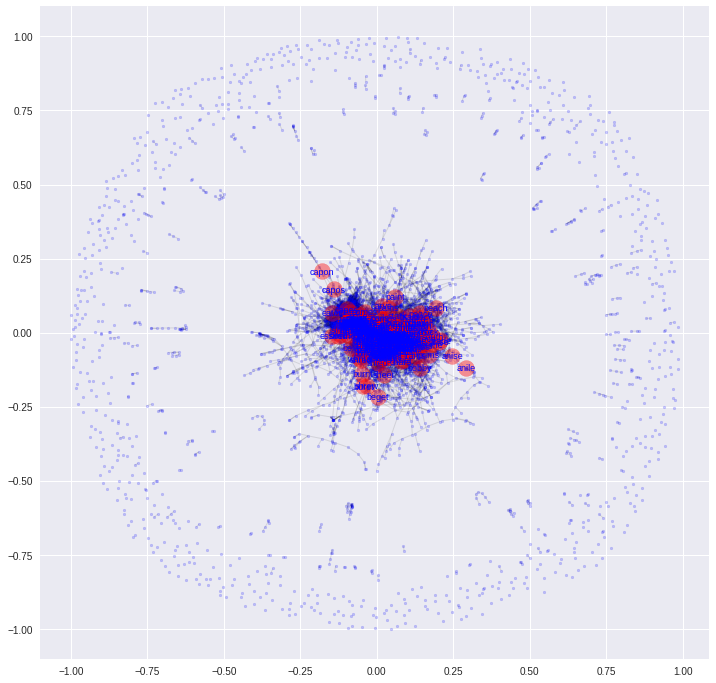

In [21]:
#Original Graph
pos = nx.spring_layout(G)

plt.figure(1,figsize=(12,12)) 
nx.draw_networkx_nodes(G,pos,node_color='b',alpha=0.2,node_size=8)
nx.draw_networkx_edges(G,pos,alpha=0.1)

# Most important (trimmed graph) through betweenness centrality
nx.draw_networkx_nodes(G_copy,pos,node_color='r',alpha=0.4,node_size=254)
nx.draw_networkx_labels(G_copy,pos,font_size=9,font_color='b')
plt.show()